# Crop Recommendation Dataset Classification
Nama: Adhira Riyanti Amanda <br/>
NRP: 5025211102 <br/>
Kelas: Pembelajaran Mesin H<br />

Dataset = https://www.kaggle.com/datasets/varshitanalluri/crop-recommendation-dataset


In [ ]:
! pip list

### Install Libraries

In [ ]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install kaggle
# %pip install scikit-learn
# %pip install python-dotenv
# %pip install scikeras
# %pip install tensorflow
# %pip install keras
# %pip install np_utils

### Import Library

In [2]:
import pandas as pd             
import numpy as np             
import matplotlib.pyplot as plt 
import seaborn as sns          
import warnings                 

# Read .env file
import os                      
from dotenv import load_dotenv

# Extract .zip file
import zipfile

# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC 

# Evaluation Matrics
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix, 
    ConfusionMatrixDisplay, 
    classification_report
)

# Hyperparameter tuning
from sklearn.model_selection import KFold, GridSearchCV

# Tensorflow
import tensorflow as tf

# Encoder
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Modeling ANN
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from scikeras.wrappers import KerasClassifier

warnings.filterwarnings("ignore")

### Import Dataset

In [3]:
load_dotenv()
username = os.getenv('USERNAME')
key = os.getenv('KEY')
cred = {"username":username,"key":key}

# if username and key:
#     print("Username:", username)
# else:
#     print("Username or key is not set.")

In [ ]:
# Create the directory if it doesn't exist
kaggle_dir = os.path.expanduser('~/.kaggle/')
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)

# Create an empty file named kaggle.json
kaggle_json_path = os.path.join(kaggle_dir, 'kaggle.json')
open(kaggle_json_path, 'a').close()  # Create an empty file

# Assuming 'cred' contains your API token
api_token = cred

# Imports the JSON module, which will be used to handle the Kaggle API credentials as a JSON object
import json

# Write api_token into the kaggle.json
with open(kaggle_json_path, 'w') as file:
    json.dump(api_token, file)

# Changes the permissions of the kaggle.json file so that only the owner has read and write permissions
os.chmod(kaggle_json_path, 0o600)

In [131]:
! kaggle datasets download -d varshitanalluri/crop-recommendation-dataset


  0%|          | 0.00/62.4k [00:00<?, ?B/s]
100%|██████████| 62.4k/62.4k [00:00<00:00, 135kB/s]
100%|██████████| 62.4k/62.4k [00:00<00:00, 133kB/s]


In [6]:
# Define the relative path to the zip file
zip_file_name = 'crop-recommendation-dataset.zip'

# Define the directory where you want to extract the contents
extract_dir = 'extracted_contents/'

# Get the current working directory
cwd = os.getcwd()

# Combine the current working directory with the relative path to the zip file
zip_file_path = os.path.join(cwd, zip_file_name)

# Open the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract all the contents to the specified directory
    zip_ref.extractall(extract_dir)

# Remove the zip file after extracting its contents
os.remove(zip_file_path)


In [2]:
df = pd.read_csv('extracted_contents/Crop_Recommendation.csv', header=0)
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [3]:
df.shape

(2200, 8)

### Exploratory Data Analysis

#### Data Description


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [7]:
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [8]:
df.nunique()

Nitrogen        137
Phosphorus      117
Potassium        73
Temperature    2200
Humidity       2200
pH_Value       2200
Rainfall       2200
Crop             22
dtype: int64

In [9]:
display(df['Crop'].value_counts())

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

#### Data Visualization

##### Distribusi

Distribusi berdasarkan crop type

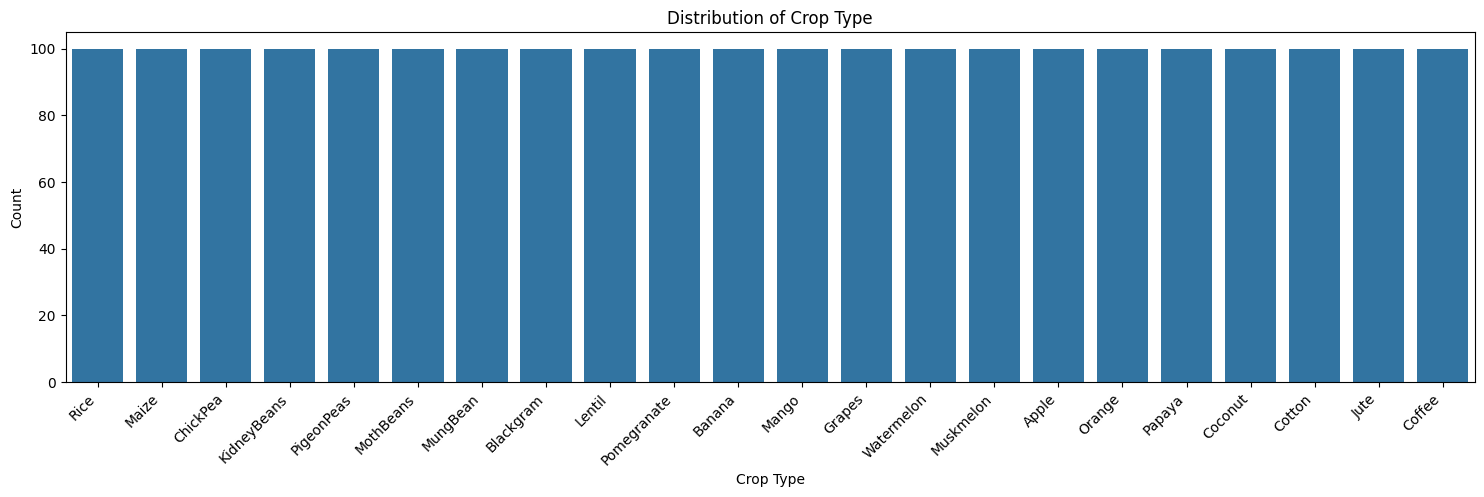

In [10]:
plt.figure(figsize=(40, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='Crop', data=df)
plt.title('Distribution of Crop Type')
plt.xlabel('Crop Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')


plt.show()

##### Crop Type Distribution By Nitrogen, Phosphorus, and Potassium

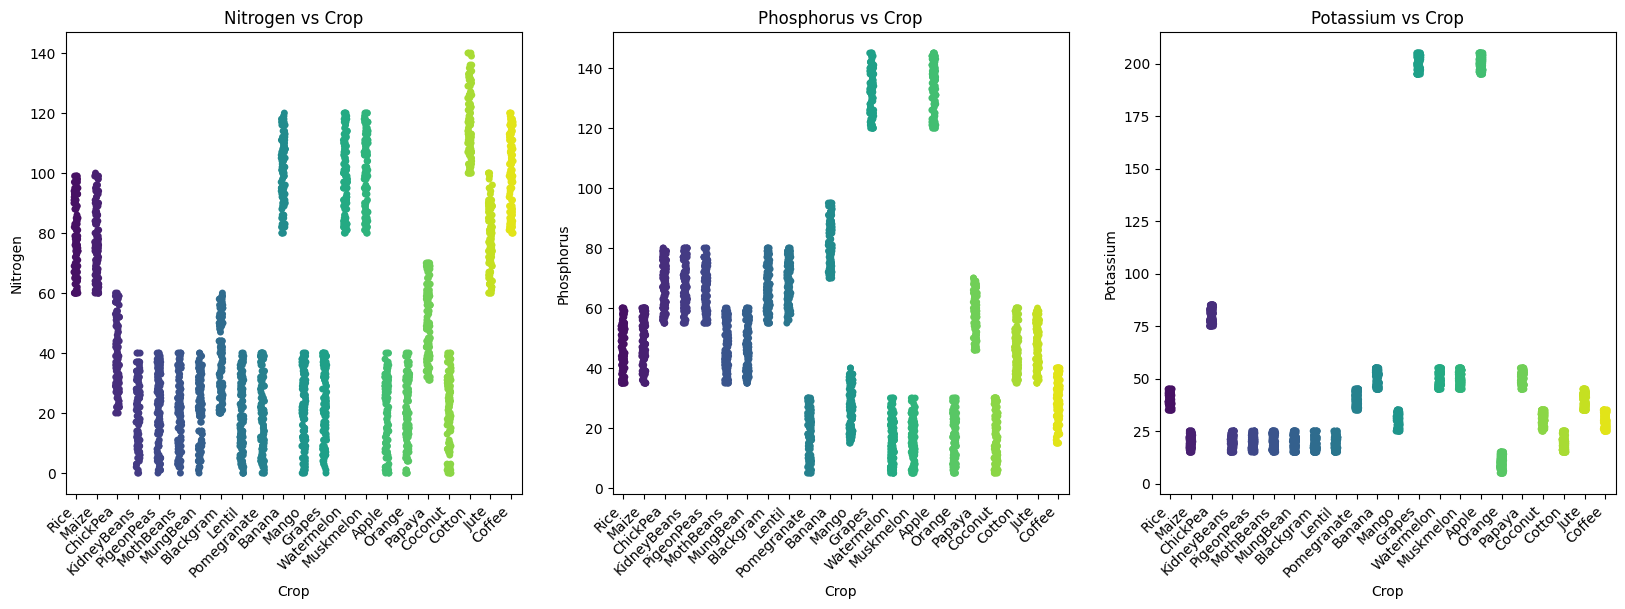

In [11]:
plt.figure(figsize = (20 ,6))
plt.subplot(1 , 3 , 1)

sns.stripplot(x = 'Crop', y = 'Nitrogen', data = df, palette='viridis')
plt.ylabel('Nitrogen')
plt.title('Nitrogen vs Crop')
plt.xticks(rotation=45, ha='right')

plt.subplot(1 , 3 , 2)

sns.stripplot(x = 'Crop', y = 'Phosphorus', data = df, palette='viridis')
plt.ylabel('Phosphorus')
plt.title('Phosphorus vs Crop')
plt.xticks(rotation=45, ha='right')

plt.subplot(1 , 3 , 3)

sns.stripplot(x = 'Crop', y = 'Potassium', data = df, palette='viridis')
plt.ylabel('Potassium')
plt.title('Potassium vs Crop')
plt.xticks(rotation=45, ha='right')

plt.show()

##### Crop Type Distribution By Temperature, Humidity, pH_Value, and Rainfall

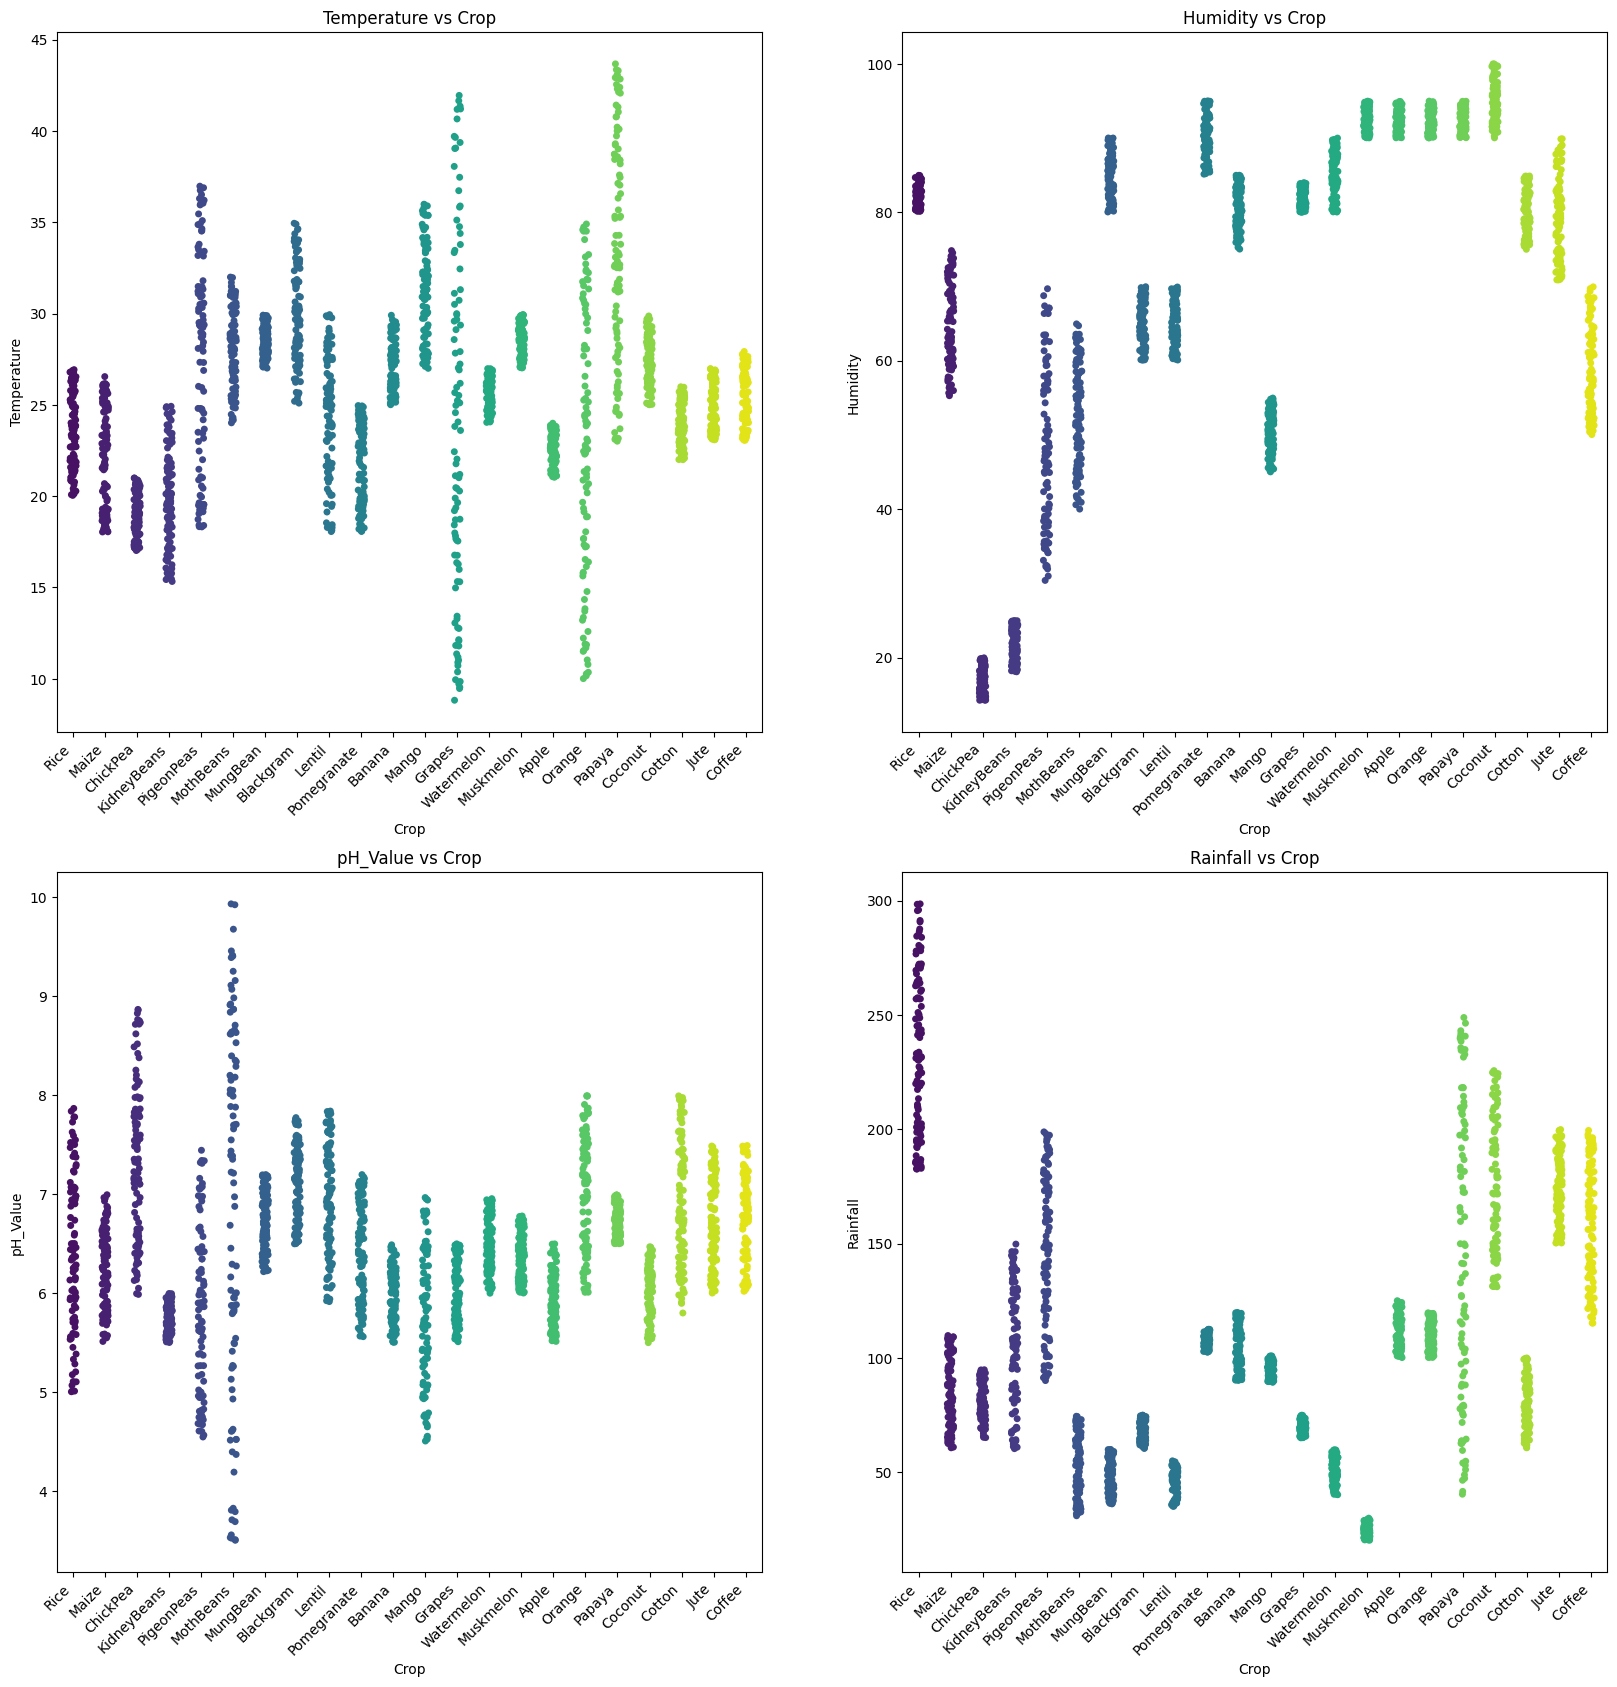

In [12]:
plt.figure(figsize = (20 ,20))

plt.subplot(2 , 2 , 1)

sns.stripplot(x = 'Crop', y = 'Temperature', data = df, palette='viridis')
plt.ylabel('Temperature')
plt.title('Temperature vs Crop')
plt.xticks(rotation=45, ha='right')

plt.subplot(2 , 2 , 2)

sns.stripplot(x = 'Crop', y = 'Humidity', data = df, palette='viridis')
plt.ylabel('Humidity')
plt.title('Humidity vs Crop')
plt.xticks(rotation=45, ha='right')

plt.subplot(2 , 2 , 3)

sns.stripplot(x = 'Crop', y = 'pH_Value', data = df, palette='viridis')
plt.ylabel('pH_Value')
plt.title('pH_Value vs Crop')
plt.xticks(rotation=45, ha='right')

plt.subplot(2 , 2 , 4)

sns.stripplot(x = 'Crop', y = 'Rainfall', data = df, palette='viridis')
plt.ylabel('Rainfall')
plt.title('Rainfall vs Crop')
plt.xticks(rotation=45, ha='right')

plt.show()

##### Heatmap

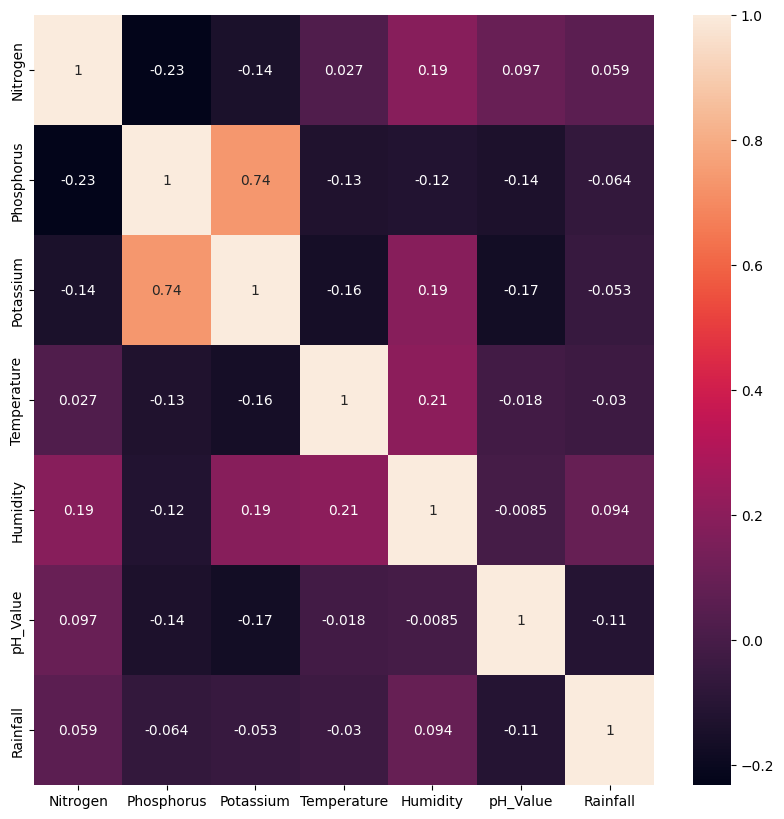

In [13]:
corr = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall']].corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True)

plt.show()

### Train Test Split

In [23]:
df['Crop'].value_counts()

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

In [24]:
df.columns

Index(['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall', 'Crop'],
      dtype='object')

In [25]:
X = df[['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'Humidity',
       'pH_Value', 'Rainfall']].values
display(X)

array([[ 90.        ,  42.        ,  43.        , ...,  82.00274423,
          6.50298529, 202.9355362 ],
       [ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 60.        ,  55.        ,  44.        , ...,  82.3207629 ,
          7.84020714, 263.9642476 ],
       ...,
       [118.        ,  33.        ,  30.        , ...,  67.22512329,
          6.36260785, 173.3228386 ],
       [117.        ,  32.        ,  34.        , ...,  52.12739421,
          6.75879255, 127.1752928 ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [26]:
Y = df['Crop'].values
display(Y)

array(['Rice', 'Rice', 'Rice', ..., 'Coffee', 'Coffee', 'Coffee'],
      dtype=object)

In [27]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
display(X)

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1760, 7) (1760,)
Test set: (440, 7) (440,)


### Classification

In [55]:
models_name = []
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [56]:
def append_data(y_test, y_pred, name):
    accuracy_list.append(accuracy_score(y_test, y_pred))
    precision_list.append(precision_score(y_test, y_pred, average='weighted'))
    recall_list.append(recall_score(y_test, y_pred, average='weighted'))
    f1_score_list.append(f1_score(y_test, y_pred, average='weighted'))
    models_name.append(name)

In [57]:
def print_eval(y_test, y_pred, labels):
    # Accuracy_score
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Classification_report
    print("Classification report:\n", classification_report(y_test, y_pred)) 

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
    disp.plot(xticks_rotation='vertical')

#### K-Nearest Neighbour

##### Before Tuning

Accuracy: 0.9727272727272728
Classification report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        18
   Blackgram       0.91      1.00      0.95        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       0.95      1.00      0.98        21
      Cotton       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.78      0.95      0.86        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       0.95      0.91      0.93        22
       Maize       1.00      0.96      0.98        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.94      0.97        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00     

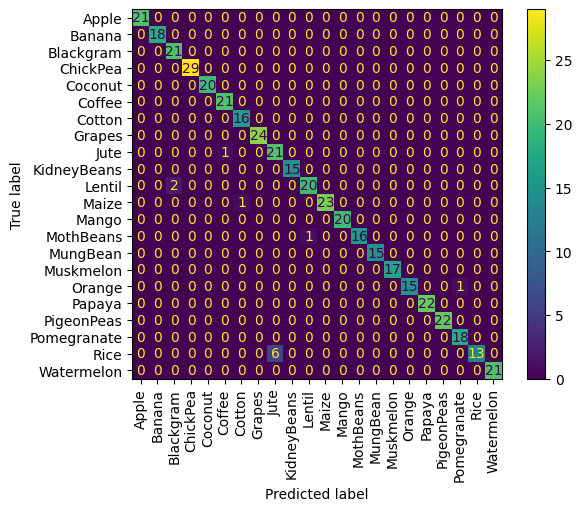

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_knn_before=knn.predict(X_test)

append_data(y_test, pred_knn_before, 'KNN - Before Tuning')

labels = knn.classes_
print_eval(y_test, pred_knn_before, labels)

##### Hyperparameter Tuning using GridSearchCV

In [59]:
# Number of fold
kf=KFold(n_splits=5,shuffle=True,random_state=42)

# Parameter Dict to be GridSearch
parameter={'n_neighbors': np.arange(2, 30, 1)}

# Build the KNN
knn=KNeighborsClassifier()

# CV = cross validation
knn_cv=GridSearchCV(knn, param_grid=parameter, cv=kf, verbose=1, return_train_score=True)
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_)
print(knn_cv.best_score_)
print(knn_cv.best_estimator_) 

knn_cv_res_df = pd.DataFrame(knn_cv.cv_results_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'n_neighbors': 3}
0.9761363636363637
KNeighborsClassifier(n_neighbors=3)


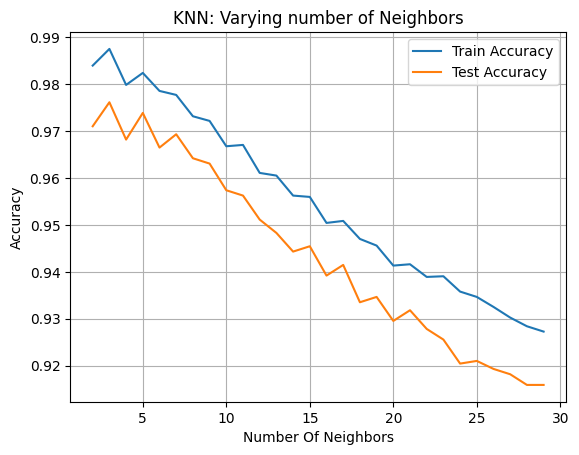

In [60]:
n_neighbors = np.arange(2, 30, 1)
plt.plot(n_neighbors, knn_cv_res_df['mean_train_score'].values, label="Train Accuracy")
plt.plot(n_neighbors, knn_cv_res_df['mean_test_score'].values, label="Test Accuracy")
plt.xlabel("Number Of Neighbors")
plt.ylabel("Accuracy")
plt.title("KNN: Varying number of Neighbors")
plt.legend()
plt.grid()
plt.show()

Accuracy for GridSearchCV result : 0.975
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        18
   Blackgram       0.84      1.00      0.91        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       0.95      1.00      0.98        21
      Cotton       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.84      0.95      0.89        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       0.95      0.82      0.88        22
       Maize       1.00      0.96      0.98        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.94      0.97        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1

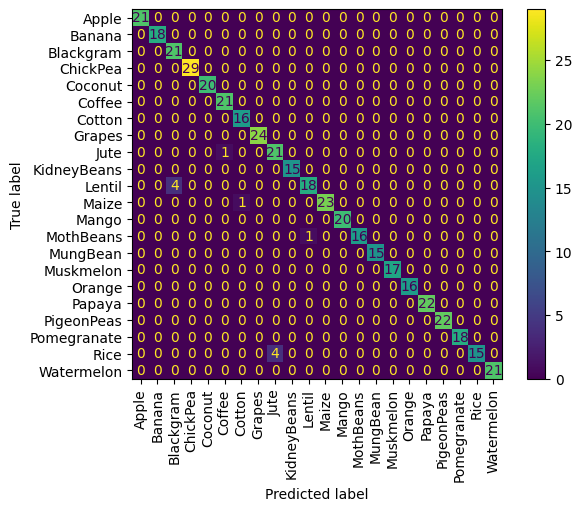

In [61]:
y_pred=knn_cv.predict(X_test)

labels = knn.classes_
print_eval(y_test, y_pred, labels)

##### After Tuning

Accuracy: 0.975
Classification report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        18
   Blackgram       0.84      1.00      0.91        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       0.95      1.00      0.98        21
      Cotton       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.84      0.95      0.89        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       0.95      0.82      0.88        22
       Maize       1.00      0.96      0.98        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.94      0.97        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      1.00      1.

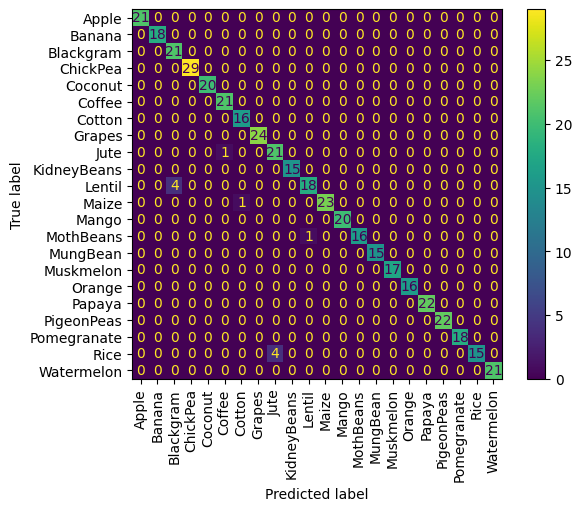

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
pred_knn_after=knn.predict(X_test)

append_data(y_test, pred_knn_after, 'KNN - After Tuning')

labels = knn.classes_
print_eval(y_test, pred_knn_after, labels)

#### Decision Tree

##### Before Tuning

Accuracy: 0.9681818181818181
Classification report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       0.95      1.00      0.97        18
   Blackgram       1.00      0.90      0.95        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        21
      Cotton       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.86      0.86      0.86        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       1.00      1.00      1.00        22
       Maize       0.92      0.96      0.94        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      1.00      1.00        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       0.94     

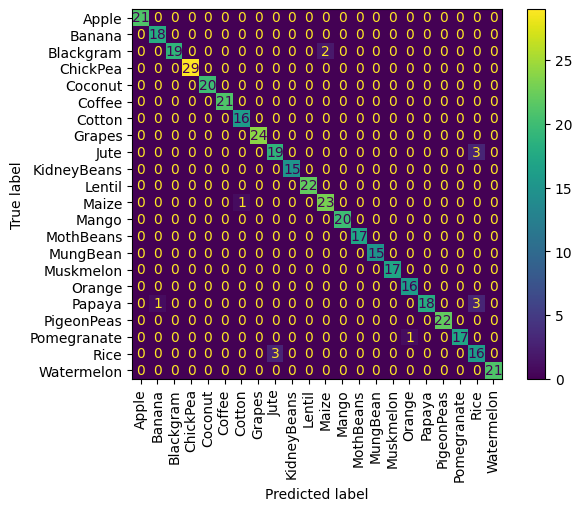

In [63]:
dt = DecisionTreeClassifier(criterion='entropy', max_depth= 10, min_samples_leaf= 4, min_samples_split= 10)
dt.fit(X_train, y_train)
pred_dt_before = dt.predict(X_test)

append_data(y_test, pred_dt_before, 'Decision Tree - Before Tuning')

labels = dt.classes_
print_eval(y_test, pred_dt_before, labels)

##### Hyperparameter Tuning using GridSearchCV

In [64]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

parameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier()

dt_cv = GridSearchCV(dt, param_grid=parameter, cv=kf, verbose=1, return_train_score=True)
dt_cv.fit(X_train, y_train)
print(dt_cv.best_params_)
print(dt_cv.best_score_)
print(dt_cv.best_estimator_) 

dt_cv_res_df = pd.DataFrame(dt_cv.cv_results_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.9852272727272726
DecisionTreeClassifier(min_samples_split=10)


In [65]:
display(dt_cv_res_df[['param_criterion', 'param_max_depth','param_min_samples_leaf', 'param_min_samples_split', 'rank_test_score', 'mean_test_score', 'mean_train_score']].sort_values(by=['rank_test_score']).head(10))
print(dt_cv_res_df.columns)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,rank_test_score,mean_test_score,mean_train_score
29,gini,None,1,10,1,0.985227,0.996733
10,gini,20,1,5,2,0.984091,0.999148
11,gini,20,1,10,3,0.984091,0.996733
9,gini,20,1,2,4,0.983523,1.000000
20,gini,30,1,10,4,0.983523,0.996875
28,gini,None,1,5,6,0.982955,0.999148
19,gini,30,1,5,7,0.982386,0.999148
18,gini,30,1,2,7,0.982386,1.000000
27,gini,None,1,2,7,0.982386,1.000000
32,gini,None,2,10,10,0.981818,0.993466


Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_criterion', 'param_max_depth', 'param_min_samples_leaf',
       'param_min_samples_split', 'params', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score', 'split0_train_score', 'split1_train_score',
       'split2_train_score', 'split3_train_score', 'split4_train_score',
       'mean_train_score', 'std_train_score'],
      dtype='object')


In [66]:
df_viz = dt_cv_res_df[['param_criterion', 'param_max_depth','param_min_samples_leaf', 'param_min_samples_split', 'rank_test_score', 'mean_test_score']][(dt_cv_res_df['param_criterion']== 'gini') & (dt_cv_res_df['param_min_samples_leaf'] == 1)]
display(df_viz)

,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,rank_test_score,mean_test_score
0,gini,10,1,2,33,0.977273
1,gini,10,1,5,14,0.979545
2,gini,10,1,10,33,0.977273
9,gini,20,1,2,4,0.983523
10,gini,20,1,5,2,0.984091
11,gini,20,1,10,3,0.984091
18,gini,30,1,2,7,0.982386
19,gini,30,1,5,7,0.982386
20,gini,30,1,10,4,0.983523
27,gini,None,1,2,7,0.982386


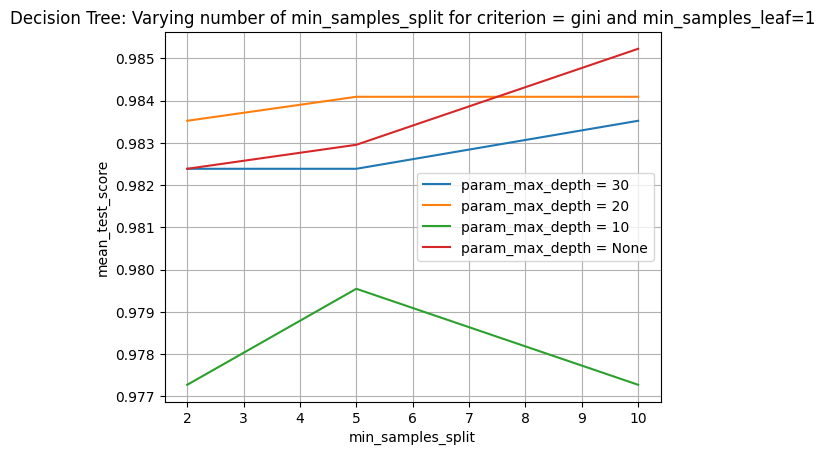

In [67]:
n_neighbors = np.arange(2, 30, 1)
plt.plot(df_viz[['param_min_samples_split']][df_viz['param_max_depth']==30].values, df_viz[['mean_test_score']][df_viz['param_max_depth']==30].values, label="param_max_depth = 30")
plt.plot(df_viz[['param_min_samples_split']][df_viz['param_max_depth']==20].values, df_viz[['mean_test_score']][df_viz['param_max_depth']==20].values, label="param_max_depth = 20")
plt.plot(df_viz[['param_min_samples_split']][df_viz['param_max_depth']==10].values, df_viz[['mean_test_score']][df_viz['param_max_depth']==10].values, label="param_max_depth = 10")
plt.plot(df_viz[['param_min_samples_split']][df_viz['param_max_depth'].isna()].values, df_viz[['mean_test_score']][df_viz['param_max_depth'].isna()].values, label="param_max_depth = None")
plt.xlabel("min_samples_split")
plt.ylabel("mean_test_score")
plt.title("Decision Tree: Varying number of min_samples_split for criterion = gini and min_samples_leaf=1")
plt.legend()
plt.grid()
plt.show()

Accuracy for GridSearchCV result : 0.9818181818181818
              precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        18
   Blackgram       1.00      0.95      0.98        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        21
      Cotton       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.94      0.77      0.85        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       1.00      1.00      1.00        22
       Maize       0.96      0.96      0.96        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      1.00      1.00        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00    

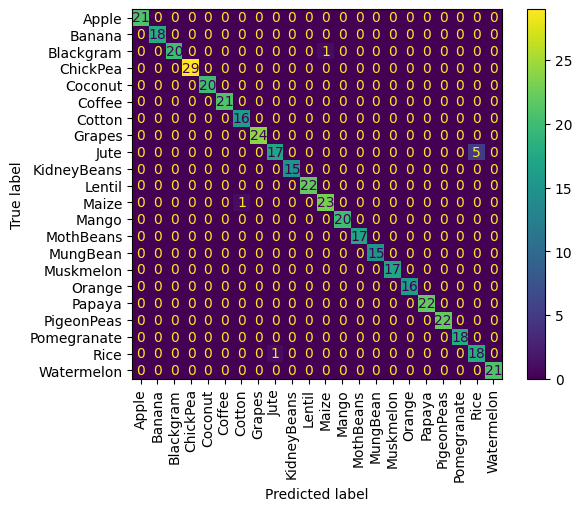

In [68]:
y_pred=dt_cv.predict(X_test)

labels = knn.classes_
print_eval(y_test, y_pred, labels)

##### After Tuning

Accuracy: 0.9818181818181818
Classification report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        18
   Blackgram       1.00      0.95      0.98        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        21
      Cotton       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.94      0.77      0.85        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       1.00      1.00      1.00        22
       Maize       0.96      0.96      0.96        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      1.00      1.00        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00     

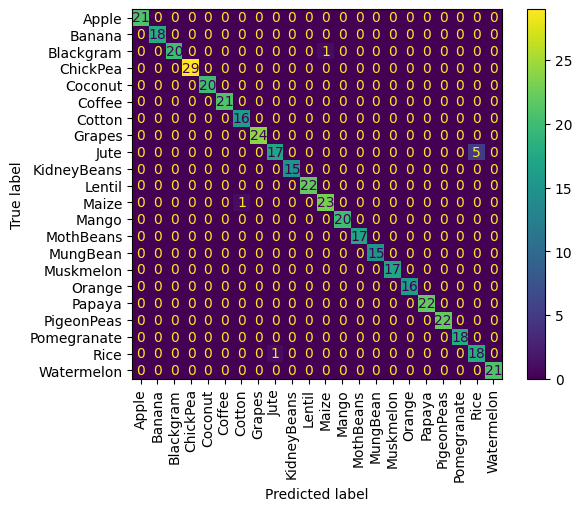

In [69]:
dt = DecisionTreeClassifier(criterion='gini', max_depth= None, min_samples_leaf= 1, min_samples_split= 10)
dt.fit(X_train, y_train)
pred_dt_after = dt.predict(X_test)

append_data(y_test, pred_dt_after, 'Decision Tree - After Tuning')

labels = dt.classes_
print_eval(y_test, pred_dt_after, labels)

In [70]:
tree_info = dt.tree_
num_nodes = tree_info.node_count
num_leaves = tree_info.n_leaves
num_decision = num_nodes - num_leaves

print("Number of nodes:", num_nodes)
print("Number of leaves:", num_leaves)
print("Number of decision:", num_decision)

Number of nodes: 77
Number of leaves: 39
Number of decision: 38


#### Naive Bayes

##### Before Tuning

Accuracy: 0.990909090909091
Classification report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        18
   Blackgram       1.00      1.00      1.00        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        21
      Cotton       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.91      0.95      0.93        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       1.00      1.00      1.00        22
       Maize       1.00      0.96      0.98        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      1.00      1.00        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      

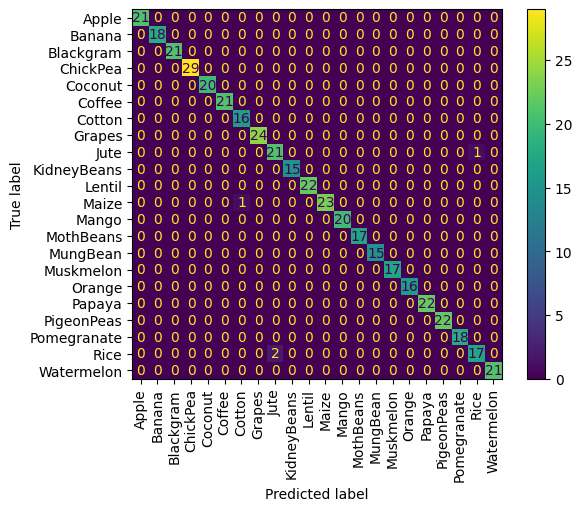

In [71]:
nb = GaussianNB()
nb.fit(X_train, y_train)
pred_nb_before=nb.predict(X_test)

append_data(y_test, pred_nb_before, 'Naive Bayes - Before Tuning')

labels = nb.classes_
print_eval(y_test, pred_nb_before, labels)


##### Hyperparameter Tuning using GridSearchCV

In [72]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)

nb = GaussianNB()
parameter = {'var_smoothing': np.logspace(0,-9, num=100)}
nb_cv = GridSearchCV(estimator=nb, param_grid=parameter, cv=kf,verbose=1) 
nb_cv.fit(X_train, y_train)

print(nb_cv.best_params_)
print(nb_cv.best_score_)
print(nb_cv.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'var_smoothing': 0.0012328467394420659}
0.9954545454545454
GaussianNB(var_smoothing=0.0012328467394420659)


##### After Tuning

Accuracy: 0.990909090909091
Classification report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        18
   Blackgram       1.00      1.00      1.00        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        21
      Cotton       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.91      0.95      0.93        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       1.00      1.00      1.00        22
       Maize       1.00      0.96      0.98        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      1.00      1.00        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00      

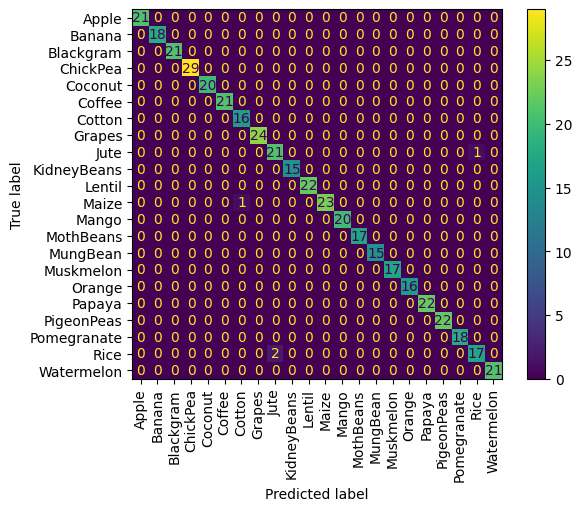

In [73]:
nb = GaussianNB(var_smoothing= 0.0012328467394420659)
nb.fit(X_train, y_train)
pred_nb_after=nb.predict(X_test)

append_data(y_test, pred_nb_after, 'Naive Bayes - After Tuning')

labels = nb.classes_
print_eval(y_test, pred_nb_after, labels)

#### Support Vector Machine

##### Before Tuning

Accuracy: 0.9795454545454545
Classification report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        18
   Blackgram       0.91      1.00      0.95        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       1.00      1.00      1.00        21
      Cotton       0.94      1.00      0.97        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.84      0.95      0.89        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       0.95      0.91      0.93        22
       Maize       1.00      0.96      0.98        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.94      0.97        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00     

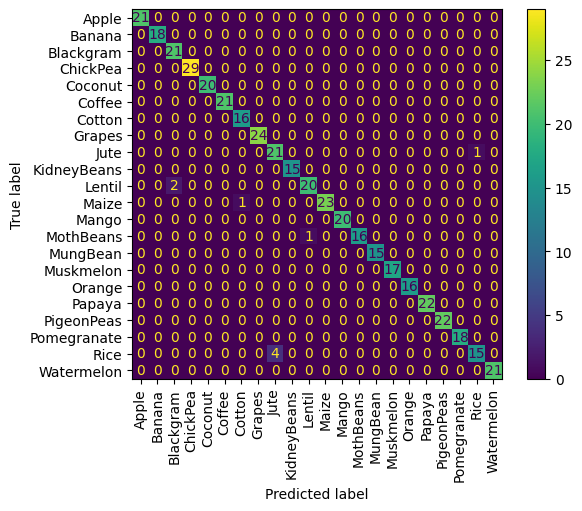

In [75]:
svc = SVC() 
svc.fit(X_train, y_train) 
pred_svc_before=svc.predict(X_test)

append_data(y_test, pred_svc_before, 'SVC - Before Tuning')

labels = svc.classes_
print_eval(y_test, pred_svc_before, labels)

##### Hyperparameter Tuning using GridSearchCV

In [76]:
svc = SVC() 

parameter = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}  

svc_cv = GridSearchCV(estimator=svc, param_grid=parameter) 
  
svc_cv.fit(X_train, y_train) 

print(svc_cv.best_params_) 
print(svc_cv.best_score_) 
print(svc_cv.best_estimator_) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.9909090909090909
SVC(C=1, gamma=1)


##### After Tuning

Accuracy: 0.9818181818181818
Classification report:
               precision    recall  f1-score   support

       Apple       1.00      1.00      1.00        21
      Banana       1.00      1.00      1.00        18
   Blackgram       0.91      1.00      0.95        21
    ChickPea       1.00      1.00      1.00        29
     Coconut       1.00      1.00      1.00        20
      Coffee       0.95      1.00      0.98        21
      Cotton       1.00      1.00      1.00        16
      Grapes       1.00      1.00      1.00        24
        Jute       0.84      0.95      0.89        22
 KidneyBeans       1.00      1.00      1.00        15
      Lentil       0.95      0.91      0.93        22
       Maize       1.00      1.00      1.00        24
       Mango       1.00      1.00      1.00        20
   MothBeans       1.00      0.94      0.97        17
    MungBean       1.00      1.00      1.00        15
   Muskmelon       1.00      1.00      1.00        17
      Orange       1.00     

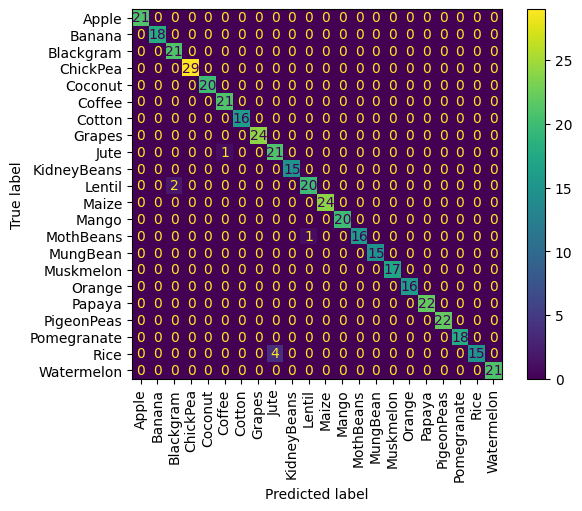

In [77]:
svc = SVC(C=1, gamma=1, kernel='rbf') 
svc.fit(X_train, y_train) 
pred_svc_after=svc.predict(X_test)

append_data(y_test, pred_svc_after, 'SVC - After Tuning')

labels = svc.classes_
print_eval(y_test, pred_svc_after, labels)

#### Artificial Neural Network

In [79]:
# Combine y_train and y_test
combined_y = np.concatenate((y_train, y_test))

# Fit a single LabelEncoder on the combined labels
encoder = LabelEncoder()
encoder.fit(combined_y)

# Transform y_train and y_test using the same encoder
encoded_y_train = encoder.transform(y_train)
dummy_y_train = to_categorical(encoded_y_train)

encoded_y_test = encoder.transform(y_test)
dummy_y_test = to_categorical(encoded_y_test)

##### Before Tuning

In [80]:
ann = Sequential()
ann.add(Dense(11, input_shape=(X.shape[1],), activation='relu'))
ann.add(Dense(22, activation='softmax'))
ann.summary()

ann.compile(
    optimizer='rmsprop', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

es = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=10, 
    restore_best_weights=True
)

history = ann.fit(
    X_train,
    dummy_y_train,
    callbacks=[es],
    epochs=100,
    batch_size=10,
    validation_data=(X_test, dummy_y_test)
)

Model: "sequential_126"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_502 (Dense)               │ (None, 11)             │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_503 (Dense)               │ (None, 22)             │           264 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 352 (1.38 KB)

 Trainable params: 352 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0424 - loss: 3.0220 - val_accuracy: 0.1500 - val_loss: 2.6514
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2225 - loss: 2.5540 - val_accuracy: 0.3545 - val_loss: 2.2119
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3946 - loss: 2.1624 - val_accuracy: 0.5591 - val_loss: 1.8159
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5375 - loss: 1.7618 - val_accuracy: 0.6591 - val_loss: 1.4587
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6479 - loss: 1.4278 - val_accuracy: 0.7341 - val_loss: 1.1705
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7240 - loss: 1.1399 - val_accuracy: 0.7841 - val_loss: 0.9421
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7934 - loss: 0.9169 - val_accuracy: 0.8318 - val_loss: 0.7677
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8605 - loss: 0.7430 - val_accu

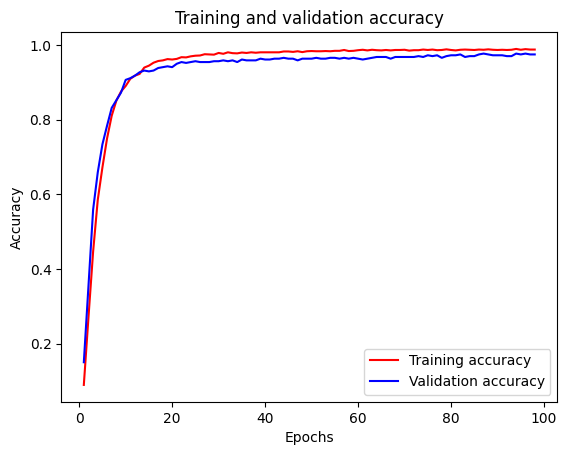

In [81]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Accuracy: 0.975
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       0.91      1.00      0.95        21
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        24
           8       0.86      0.86      0.86        22
           9       0.94      1.00      0.97        15
          10       1.00      0.91      0.95        22
          11       1.00      1.00      1.00        24
          12       1.00      1.00      1.00        20
          13       0.94      0.94      0.94        17
          14       1.00      1.00      1.00        15
          15       0.94      1.00      0.97        17
 

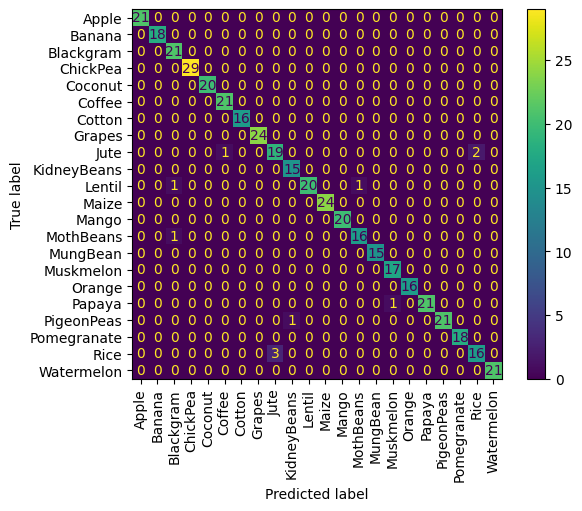

In [82]:
pred_svc = ann.predict(X_test)
pred_svc_before = np.argmax(pred_svc, axis=1)

y_pred_labels = encoder.inverse_transform(pred_svc_before)
y_test_labels = encoder.inverse_transform(encoded_y_test)

labels = encoder.classes_

print_eval(encoded_y_test, pred_svc_before, labels)
append_data(encoded_y_test, pred_svc_before, "ANN - Before Tuning")

##### Hyperparameter Tuning with GridSearchCV

In [44]:
params={
        'model__optimizer':['adam','rmsprop'],
        'model__activation':['relu'],
        'batch_size': [10, 25],
        'epochs': [100, 150],
        'callbacks': [es]
}

def build_clf(optimizer, activation): 

  ann = Sequential() 
  ann.add(Dense(units=7, activation=activation, input_dim=X_train.shape[1])) 
  ann.add(Dense(units=15, activation=activation)) 
  ann.add(Dense(units=25, activation=activation)) 
  ann.add(Dense(units=30, activation=activation)) 
  ann.add(Dense(units=22, activation='sigmoid')) 
  ann.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy']) 
  return ann
  
model=KerasClassifier(build_fn=build_clf)

ann_cv = GridSearchCV(estimator=model, param_grid=params)

history = ann_cv.fit(
    X_train,
    dummy_y_train
)

Epoch 1/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0730 - loss: 3.0234
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2479 - loss: 2.3800
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5314 - loss: 1.4998
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7118 - loss: 0.9975
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7745 - loss: 0.7178
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8084 - loss: 0.5843
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8287 - loss: 0.4846
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8726 - loss: 0.3934
Epoch 9/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8855 - loss: 0.3475
Epoch 10/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9014 - loss: 0.3096
Epoch 11/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9288 - loss: 0.2426
Epoch 12/100
141/141 ━━━━━━━━━━━━━━━━━━━━

In [45]:
print(ann_cv.best_params_) 
print(ann_cv.best_estimator_) 
print(ann_cv.best_score_)

{'batch_size': 10, 'callbacks': <keras.src.callbacks.early_stopping.EarlyStopping object at 0x000001ED7FDA5090>, 'epochs': 100, 'model__activation': 'relu', 'model__optimizer': 'adam'}
KerasClassifier(
	model=None
	build_fn=<function build_clf at 0x000001ED2371A9E0>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=<keras.src.callbacks.early_stopping.EarlyStopping object at 0x000001ED31DA0C40>
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
	model__activation=relu
	model__optimizer=adam
)
0.9801136363636364


##### After Tuning

In [83]:
ann = Sequential() 
ann.add(Dense(units=7, activation='relu', input_dim=X_train.shape[1])) 
ann.add(Dense(units=15, activation='relu')) 
ann.add(Dense(units=25, activation='relu')) 
ann.add(Dense(units=30, activation='relu')) 
ann.add(Dense(units=22, activation='sigmoid')) 

ann.compile(
    optimizer='adam', 
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

es = keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    mode='min',
    patience=10, 
    restore_best_weights=True
)

history = ann.fit(
    X_train,
    dummy_y_train,
    callbacks=[es],
    epochs=100,
    batch_size=10,
    validation_data=(X_test, dummy_y_test)
)

Epoch 1/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0904 - loss: 3.0055 - val_accuracy: 0.2500 - val_loss: 2.4203
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3650 - loss: 2.1219 - val_accuracy: 0.6091 - val_loss: 1.2566
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6891 - loss: 1.0651 - val_accuracy: 0.7386 - val_loss: 0.7314
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7575 - loss: 0.6684 - val_accuracy: 0.7705 - val_loss: 0.5549
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8149 - loss: 0.5049 - val_accuracy: 0.8341 - val_loss: 0.4194
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8555 - loss: 0.4006 - val_accuracy: 0.8500 - val_loss: 0.3855
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8662 - loss: 0.3619 - val_accuracy: 0.8659 - val_loss: 0.3472
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8999 - loss: 0.2955 - val_accu

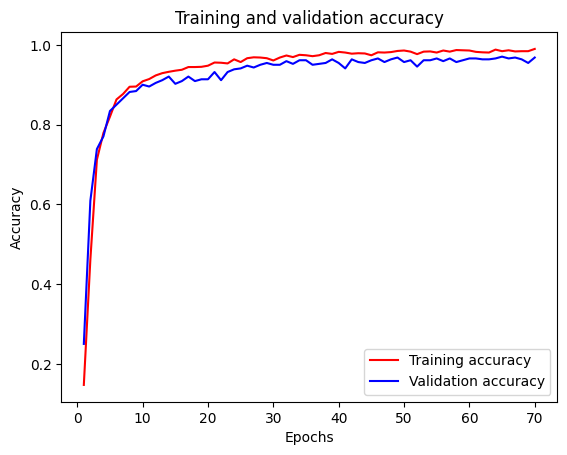

In [84]:
history_dict = history.history

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Accuracy: 0.9659090909090909
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        18
           2       0.84      1.00      0.91        21
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        20
           5       0.95      1.00      0.98        21
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        24
           8       0.84      0.73      0.78        22
           9       1.00      1.00      1.00        15
          10       0.95      0.86      0.90        22
          11       0.96      1.00      0.98        24
          12       1.00      1.00      1.00        20
          13       1.00      0.88      0.94        17
          14       0.94      1.00      0.97        15
          15       1.00      1.00      1.0

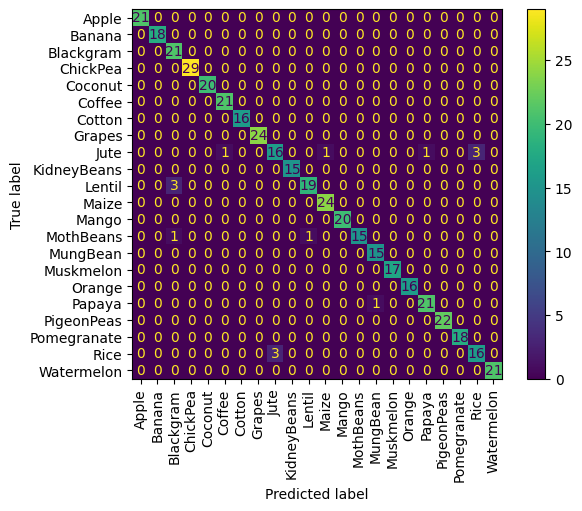

In [85]:
pred_svc = ann.predict(X_test)
pred_svc_before = np.argmax(pred_svc, axis=1)

y_pred_labels = encoder.inverse_transform(pred_svc_before)
y_test_labels = encoder.inverse_transform(encoded_y_test)

labels = encoder.classes_

print_eval(encoded_y_test, pred_svc_before, labels)
append_data(encoded_y_test, pred_svc_before, "ANN - After Tuning")

## Comparing Accuracy and Summary

In [86]:
data = {'Model': models_name, 'Akurasi': accuracy_list, 'Presisi': precision_list, 'Recall_list': recall_list, 'F1-Score': f1_score_list}
evaluation = pd.DataFrame(data)
evaluation = evaluation.sort_values(by='Akurasi', ascending=False)
evaluation

,Model,Akurasi,Presisi,Recall_list,F1-Score
4,Naive Bayes - Before Tuning,0.990909,0.991114,0.990909,0.990903
5,Naive Bayes - After Tuning,0.990909,0.991114,0.990909,0.990903
3,Decision Tree - After Tuning,0.981818,0.983423,0.981818,0.981792
7,SVC - After Tuning,0.981818,0.983299,0.981818,0.981662
6,SVC - Before Tuning,0.979545,0.980631,0.979545,0.979421
1,KNN - After Tuning,0.975000,0.977424,0.975000,0.974810
8,ANN - Before Tuning,0.975000,0.975514,0.975000,0.974884
0,KNN - Before Tuning,0.972727,0.975896,0.972727,0.972281
2,Decision Tree - Before Tuning,0.968182,0.970610,0.968182,0.968499
9,ANN - After Tuning,0.965909,0.966396,0.965909,0.965284


Kesimpulan: Classifier yang cocok untuk dataset crops ini adalah Naive Bayes dengan nilai akurasi paling tinggi diantara classifier lainnya. Tidak ada perbedaan akurasi antara Naive Bayes sebelum dilakukan tuning dan setelah dilakukan tuning, sehingga tidak diperlukan tuning classifier Naive Bayes untuk dataset ini.

Hyperparameter tuning menggunakan gridsearchcv pada parameter ANN membutuhkan waktu yang sangat lama, sehingga untuk mendapatkan parameter yang sesuai untuk parameter ANN tersebut belum dapat dilakukan menggunakan device ini